In [1]:
#In this notebook we try to practice all the classification algorithms that we learned in this course.

#We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

#Lets first load required libraries:


import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

from pathlib import Path
data_path = Path('../data')

from sklearn import preprocessing
%matplotlib inline

Understanding the Data

MARCA MODELO==	MAKE MODEL;
        MOTOR==	cubic capacity;
        CAMBIO==	type of vehicle speed change;
            CV==	horsepower vehicle;
  COMBUSTIBLE==   FUEL;
        COLOR==	COLOUR;
    PROVEEDOR==	SUPPLIER;
        YEARS==	car age;
        PLAZAS==	car seats;
            PCC==	purchase price with commissions;
        PCOMPRA==	purchase price without commissions;
        PVENTA==	sale price;
        BRUTO==	gross margin;
        NETO==	net margin;
            KM==	KM;
        C AUTO1==	price commission;
        tipo==	vehicle type;
        llantas==	Tires;
     C.P Zip==    code;
    localidad==	locality;
    provincia==	province;
        pais==	country;
nacionalidad==	nationality;
        sexo==	sex;
        edad==	age;
         mes==	sale month;
        year==	sale year;
CTE.GARANTÍA==	cost in guarantee;
CTE..PREPARACIÓN==	preparation cost;
    CTE.TOTAL==	total cost;
        BF.NETO==	net profit;
    GARANTIA==	Garantia=1 guaranteed car  , Grantía=2 without guarantee;
        MESES==	MESES=1 sold in 2 or less months, MESES=2 sold in more than 2 months;
    GARANTIA2==	Garantia=si guaranteed car  , Grantía=no without guarantee
    


In [2]:

#Load Data From xlsx File
#Let's load the dataset 


df = pd.read_excel(data_path / 'VENDIDOS1MESHISTORICOml2.xlsx')

df.head()


,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,...,edad,mes,year,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES,GARANTIA2
0,RENAULT MEGANE,1.6,MANUAL,75,GASOLINA,NaN,G.COSTA,10,NaN,956.6,...,NaN,1,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VOLVO S60,2.5,MANUAL,145,GASOLINA,NaN,PARTICULAR,7,NaN,7900.0,...,NaN,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,1.9,MANUAL,130,DIESEL,NaN,LEASEPLAN,5,NaN,11200.0,...,NaN,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SEAT TOLEDO,1.9,MANUAL,110,DIESEL,NaN,LEASEPLAN,5,NaN,7300.0,...,NaN,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKODA OCTAVIA,1.9,MANUAL,105,DIESEL,NaN,LEASEPLAN,3,NaN,10000.0,...,NaN,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(393, 34)

In [4]:
df['MESES'].value_counts()

1.0    190
2.0    104
Name: MESES, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000291982A1E88>]],
      dtype=object)

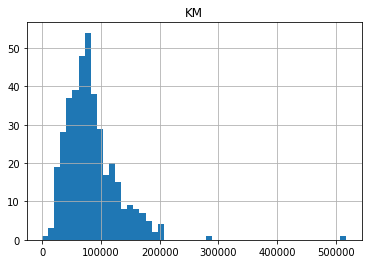

In [5]:
df.hist(column='KM', bins=50)

In [6]:

#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
df.drop(['GARANTIA','MOTOR','COLOR','PCOMPRA','BF.NETO','CTE.TOTAL','CTE.GARANTÍA','edad','sexo','nacionalidad','pais','provincia','localidad','C.P','C AUTO1','NETO','BRUTO','mes'], axis = 'columns', inplace=True)

In [7]:
#Feature after One Hot Encoding
df.head()

,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES,GARANTIA2
0,RENAULT MEGANE,MANUAL,75,GASOLINA,G.COSTA,10,NaN,956.6,4500,109988,med,si,2008,NaN,NaN,NaN
1,VOLVO S60,MANUAL,145,GASOLINA,PARTICULAR,7,NaN,7900.0,10500,185390,gra,si,2008,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,MANUAL,130,DIESEL,LEASEPLAN,5,NaN,11200.0,15750,73790,gra,si,2008,NaN,NaN,NaN
3,SEAT TOLEDO,MANUAL,110,DIESEL,LEASEPLAN,5,NaN,7300.0,9900,97257,gra,si,2008,NaN,NaN,NaN
4,SKODA OCTAVIA,MANUAL,105,DIESEL,LEASEPLAN,3,NaN,10000.0,12600,92481,gra,si,2008,NaN,NaN,NaN


In [8]:
df = df.dropna()
df.head()

,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES,GARANTIA2
99,VOLKSWAGEN POLO,MANUAL,75,GASOLINA,MAVISA,12,5.0,1805.0,4500,91431,peq,si,2016,2089.46,2.0,si
100,OPEL INSIGNIA,MANUAL,130,DIESEL,ARVAL,4,5.0,10821.0,13300,74210,gra,si,2016,307.60,1.0,si
101,CITROEN C4,MANUAL,110,GASOLINA,AUTO1,10,5.0,2250.0,5300,82294,med,no,2016,986.07,1.0,si
102,AUDI A4,MANUAL,130,DIESEL,MUNDOMOVIL,12,5.0,4000.0,7500,184488,gra,si,2016,967.89,1.0,si
103,RENAULT TRAFIC,MANUAL,115,DIESEL,ARVAL,6,6.0,10900.0,13700,84172,fur,no,2016,821.60,1.0,si


In [9]:

grouped_test_meses = df.groupby(['MESES'],as_index= False).mean()
grouped_test_meses


,MESES,CV,YEARS,PLAZAS,PCC,PVENTA,KM,year,CTE..PREPARACIÓN
0,1.0,110.515789,8.910526,5.168421,5036.711105,7861.152632,84688.684211,2016.884211,772.106368
1,2.0,106.134615,9.413462,5.115385,4709.759231,7115.500000,101782.778846,2017.336538,1152.810577


In [10]:
# Let´s look at features evolution over years.
grouped_test_meses = df.groupby(['year'],as_index= False).mean()
grouped_test_meses

,year,CV,YEARS,PLAZAS,PCC,PVENTA,KM,CTE..PREPARACIÓN,MESES
0,2015,114.927711,7.939759,5.120482,5086.043253,7726.746988,109359.397590,845.671446,1.361446
1,2016,114.477612,8.000000,5.208955,6052.134328,8925.074627,96598.134328,785.515522,1.268657
2,2017,108.533333,8.533333,5.300000,5307.850333,8060.133333,95596.933333,892.188667,1.400000
3,2018,105.292683,9.975610,5.219512,4419.829268,7120.780488,79115.195122,928.965366,1.292683
4,2019,99.694444,10.138889,5.000000,3866.610278,6390.555556,61861.500000,1089.972778,1.277778
5,2020,101.578947,11.052632,5.000000,4083.052632,6378.421053,69018.263158,1208.145789,1.526316
6,2021,93.214286,12.428571,5.142857,3605.928571,6162.857143,80879.928571,908.870714,1.642857
7,2022,107.500000,15.750000,5.000000,2862.000000,5761.250000,86260.750000,1000.255000,1.750000


We want to know wich cars  returns the largest item in each argument for MESES==1.0 in year>=2020, group by year tipo and COMBUSTIBLE.

In [11]:
grouped_test_mesesmax = df.groupby(['MESES','year','tipo','COMBUSTIBLE'],as_index= False).max()
grouped_test_mesesmax.drop(['MARCA MODELO','CAMBIO','PROVEEDOR','llantas'], axis = 'columns', inplace=True)
grouped_test_mesesmax[(grouped_test_mesesmax.year>=2020) & (grouped_test_mesesmax.MESES==1.0)]



,MESES,year,tipo,COMBUSTIBLE,CV,YEARS,PLAZAS,PCC,PVENTA,KM,CTE..PREPARACIÓN,GARANTIA2
47,1.0,2020,med,DIESEL,110,14,5.0,3581.0,6250,85589,1449.67,si
48,1.0,2020,med,GASOLINA,125,15,5.0,1962.0,4700,37374,455.25,si
49,1.0,2020,mon,GASOLINA,110,11,5.0,3631.0,6200,43482,775.15,si
50,1.0,2020,peq,GASOLINA,88,12,5.0,4940.0,7500,56619,1449.58,si
51,1.0,2021,gra,GASOLINA,125,14,5.0,2053.0,5795,91414,1490.32,si
52,1.0,2021,med,GASOLINA,115,16,5.0,4350.0,7100,86124,1045.56,si
53,1.0,2021,peq,DIESEL,90,14,5.0,3732.0,6450,78567,1226.75,si
54,1.0,2022,med,DIESEL,125,11,5.0,4500.0,7800,103186,0.00,si


Now we are looking for wich cars  returns the smallest item in each argument for MESES==1.0 in year>=2020, group by year tipo and COMBUSTIBLE.

In [12]:

grouped_test_mesesmin = df.groupby(['MESES','year','tipo','COMBUSTIBLE'],as_index= False).min()
grouped_test_mesesmin.drop(['MARCA MODELO','CAMBIO','PROVEEDOR','llantas'], axis = 'columns', inplace=True)
grouped_test_mesesmin[(grouped_test_mesesmax.year>=2020) & (grouped_test_mesesmax.MESES==1.0)]


,MESES,year,tipo,COMBUSTIBLE,CV,YEARS,PLAZAS,PCC,PVENTA,KM,CTE..PREPARACIÓN,GARANTIA2
47,1.0,2020,med,DIESEL,81,10,5.0,1000.0,4300,35253,411.69,si
48,1.0,2020,med,GASOLINA,125,15,5.0,1962.0,4700,37374,455.25,si
49,1.0,2020,mon,GASOLINA,110,11,5.0,3631.0,6200,43482,775.15,si
50,1.0,2020,peq,GASOLINA,80,7,5.0,3000.0,5800,39235,212.86,si
51,1.0,2021,gra,GASOLINA,125,14,5.0,2053.0,5795,91414,1490.32,si
52,1.0,2021,med,GASOLINA,102,14,5.0,2981.0,5600,66898,322.19,si
53,1.0,2021,peq,DIESEL,70,11,5.0,2041.0,5200,78297,1116.28,si
54,1.0,2022,med,DIESEL,125,11,5.0,4500.0,7800,103186,0.00,si


In [13]:
df.isnull().sum()

MARCA MODELO        0
CAMBIO              0
CV                  0
COMBUSTIBLE         0
PROVEEDOR           0
YEARS               0
PLAZAS              0
PCC                 0
PVENTA              0
KM                  0
tipo                0
llantas             0
year                0
CTE..PREPARACIÓN    0
MESES               0
GARANTIA2           0
dtype: int64

In [14]:
df = pd.DataFrame(df)

df_columns = df.columns

predictors = df[df_columns[df_columns != 'MESES']] # all columns except MESES 
target = df['MESES'] # MESES  column

In [15]:
predictors.head()

,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,GARANTIA2
99,VOLKSWAGEN POLO,MANUAL,75,GASOLINA,MAVISA,12,5.0,1805.0,4500,91431,peq,si,2016,2089.46,si
100,OPEL INSIGNIA,MANUAL,130,DIESEL,ARVAL,4,5.0,10821.0,13300,74210,gra,si,2016,307.60,si
101,CITROEN C4,MANUAL,110,GASOLINA,AUTO1,10,5.0,2250.0,5300,82294,med,no,2016,986.07,si
102,AUDI A4,MANUAL,130,DIESEL,MUNDOMOVIL,12,5.0,4000.0,7500,184488,gra,si,2016,967.89,si
103,RENAULT TRAFIC,MANUAL,115,DIESEL,ARVAL,6,6.0,10900.0,13700,84172,fur,no,2016,821.60,si


In [16]:
target.head()

99     2.0
100    1.0
101    1.0
102    1.0
103    1.0
Name: MESES, dtype: float64

In [17]:
predictors = pd.get_dummies(predictors, columns = ["MARCA MODELO"])
predictors = pd.get_dummies(predictors, columns = ["PROVEEDOR"])
predictors = pd.get_dummies(predictors, columns = ["CAMBIO"])
predictors = pd.get_dummies(predictors, columns = ["COMBUSTIBLE"])
predictors = pd.get_dummies(predictors, columns = ["tipo"])
predictors = pd.get_dummies(predictors, columns = ["llantas"])
predictors = pd.get_dummies(predictors, columns = ["GARANTIA2"])

In [18]:
#Feature selection
#Lets defind feature sets, X:


x = predictors
x[0:5]


,CV,YEARS,PLAZAS,PCC,PVENTA,KM,year,CTE..PREPARACIÓN,MARCA MODELO_AUDI A4,MARCA MODELO_AUDI A6,...,tipo_mon,tipo_monp,tipo_peq,tipo_pickup,tipo_sub,tipo_tt,llantas_no,llantas_si,GARANTIA2_no,GARANTIA2_si
99,75,12,5.0,1805.0,4500,91431,2016,2089.46,0,0,...,0,0,1,0,0,0,0,1,0,1
100,130,4,5.0,10821.0,13300,74210,2016,307.60,0,0,...,0,0,0,0,0,0,0,1,0,1
101,110,10,5.0,2250.0,5300,82294,2016,986.07,0,0,...,0,0,0,0,0,0,1,0,0,1
102,130,12,5.0,4000.0,7500,184488,2016,967.89,1,0,...,0,0,0,0,0,0,0,1,0,1
103,115,6,6.0,10900.0,13700,84172,2016,821.60,0,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:

#What are our lables? 


y = target
y

99     2.0
100    1.0
101    1.0
102    1.0
103    1.0
      ... 
388    2.0
389    1.0
390    2.0
391    2.0
392    2.0
Name: MESES, Length: 294, dtype: float64

In [20]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[-1.34941905,  0.93322851, -0.26270647, -1.11555587, -1.07559348,
         0.01416573, -0.54521739,  2.05336808, -0.1672484 , -0.08276059,
        -0.10153462, -0.05842062, -0.05842062, -0.14433757, -0.20628425,
        -0.11744404, -0.05842062, -0.13153341, -0.05842062, -0.08276059,
        -0.05842062, -0.05842062, -0.05842062, -0.05842062, -0.10153462,
        -0.13153341, -0.2236068 , -0.05842062, -0.05842062, -0.11744404,
        -0.05842062, -0.05842062, -0.05842062, -0.08276059, -0.05842062,
        -0.05842062, -0.08276059, -0.05842062, -0.05842062, -0.05842062,
        -0.11744404, -0.05842062, -0.15617376, -0.05842062, -0.32444284,
        -0.08276059, -0.11744404, -0.25537696, -0.17770466, -0.05842062,
        -0.11744404, -0.19715288, -0.08276059, -0.05842062, -0.05842062,
        -0.05842062, -0.08276059, -0.05842062, -0.05842062, -0.05842062,
        -0.14433757, -0.05842062, -0.08276059, -0.10153462, -0.11744404,
        -0.13153341, -0.20628425, -0.08276059, -0.0

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (235, 128) (235,)
Test set: (59, 128) (59,)


In [22]:
#Import library
#Classifier implementing the k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [23]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.52542373, 0.61016949, 0.52542373, 0.6440678 , 0.55932203,
       0.62711864, 0.59322034, 0.66101695, 0.61016949, 0.6779661 ,
       0.6779661 , 0.69491525, 0.69491525, 0.72881356, 0.6779661 ,
       0.69491525, 0.71186441, 0.71186441, 0.69491525])

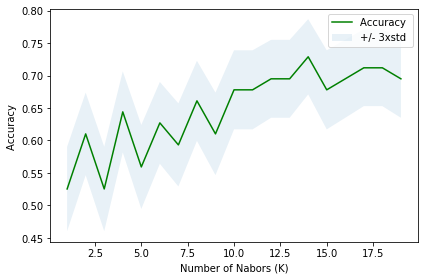

In [24]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7288135593220338 with k= 14


In [26]:
#Setting up the Decision Tree
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
predbecars = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [27]:
predbecars # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
predbecars.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
predbecars = predbecars.predict(X_testset)

In [30]:
print (predbecars [0:5])
print (y_testset [0:5])

[2. 1. 2. 2. 1.]
250    2.0
379    2.0
200    1.0
361    2.0
115    2.0
Name: MESES, dtype: float64


In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predbecars))

DecisionTrees's Accuracy:  0.6179775280898876


In [32]:
#Modeling (Logistic Regression with Scikit-learn)
#import logistic regression and use liblinear numerical optimizer t find parameters
#use a C parameter of 0.01
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
#Now we can predict using our test set:
yhat = LR.predict(X_test)
yhat


array([1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
       1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1.,
       2., 2., 2., 2., 1., 1., 1., 1.])

In [34]:
#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of 
#class 1, P(Y=1|X), and second column is probability of class 2, P(Y=2|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.68930765, 0.31069235],
       [0.60282845, 0.39717155],
       [0.31318383, 0.68681617],
       [0.68414771, 0.31585229],
       [0.55173445, 0.44826555],
       [0.55400332, 0.44599668],
       [0.6300514 , 0.3699486 ],
       [0.35732167, 0.64267833],
       [0.51824165, 0.48175835],
       [0.5387025 , 0.4612975 ],
       [0.55914332, 0.44085668],
       [0.60563311, 0.39436689],
       [0.57220757, 0.42779243],
       [0.55483765, 0.44516235],
       [0.58202436, 0.41797564],
       [0.49042556, 0.50957444],
       [0.54116716, 0.45883284],
       [0.3706948 , 0.6293052 ],
       [0.70753279, 0.29246721],
       [0.50010029, 0.49989971],
       [0.50750191, 0.49249809],
       [0.64244523, 0.35755477],
       [0.43006038, 0.56993962],
       [0.60561489, 0.39438511],
       [0.4751643 , 0.5248357 ],
       [0.52238396, 0.47761604],
       [0.38887617, 0.61112383],
       [0.63697391, 0.36302609],
       [0.54639848, 0.45360152],
       [0.50622187, 0.49377813],
       [0.

In [35]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat)

0.6

In [36]:
 # Another way of looking to accuracy of the classifier is to look at confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[30 11]
 [ 9  9]]


Confusion matrix, without normalization
[[30 11]
 [ 9  9]]


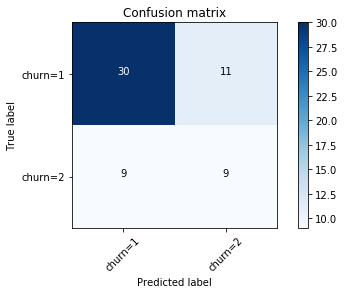

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=2'],normalize= False,  title='Confusion matrix')

In [38]:
#For 30 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1, and 11 as 2 
#which is a good 73%.
#The classifier correctly predicted 9 of them as 2, and 9 of them wrongly as 1. So, it has done a  50% in predicting the
#customers with churn value 2. 

In [39]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         1.0       0.77      0.73      0.75        41
         2.0       0.45      0.50      0.47        18

    accuracy                           0.66        59
   macro avg       0.61      0.62      0.61        59
weighted avg       0.67      0.66      0.67        59



In [40]:
#Finally, we can tell the average accuracy for this classifier is the weighted avg of the F1-score for both labels, which is 
# 0.67 in our case.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6909445528587216

In [41]:
# We build a new Logistic Regression model again for the same dataset, but this time, using different solver
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.63


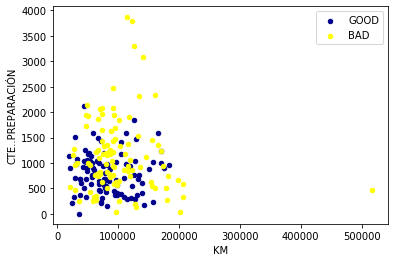

In [42]:
#Modeling (SVM with Scikit-learn)

#Lets look at the distribution of the classes based on KM (kilometers) and CTE..PREPARACIÓN:
ax = df[df['MESES'] == 1][0:100].plot(kind='scatter', x='KM', y='CTE..PREPARACIÓN', color='DarkBlue', label='GOOD');
df[df['MESES'] == 2][0:100].plot(kind='scatter', x='KM', y='CTE..PREPARACIÓN', color='Yellow', label='BAD', ax=ax);
plt.show()


In [43]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [44]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1., 1., 2., 1., 1.])

In [45]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         1.0       0.71      0.88      0.78        41
         2.0       0.38      0.17      0.23        18

    accuracy                           0.66        59
   macro avg       0.54      0.52      0.51        59
weighted avg       0.60      0.66      0.61        59

Confusion matrix, without normalization
[[36  5]
 [15  3]]


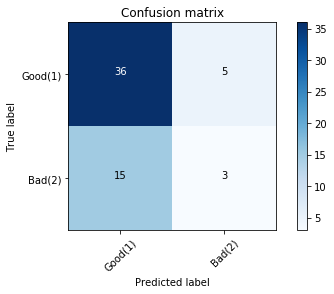

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good(1)','Bad(2)'],normalize= False,  title='Confusion matrix')

In [48]:
#You can also easily use the f1_score from sklearn library:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6142508928065302

In [49]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6428571428571429

In [50]:
# We rebuild the model, but this time with a __linear__ kernel
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.6842
Jaccard score: 0.6122


              precision    recall  f1-score   support

         1.0       0.79      0.73      0.76        41
         2.0       0.48      0.56      0.51        18

    accuracy                           0.68        59
   macro avg       0.63      0.64      0.64        59
weighted avg       0.69      0.68      0.68        59

Confusion matrix, without normalization
[[30 11]
 [ 8 10]]


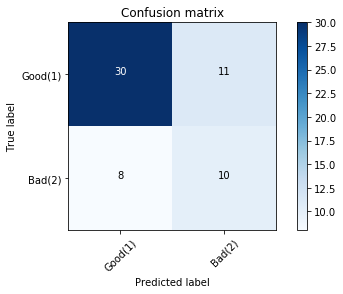

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good(1)','Bad(2)'],normalize= False,  title='Confusion matrix')

In [52]:
# The best accuracy was with classifier implementing the k-nearest neighbors 0.7288135593220338 with  k= 14.